https://github.com/pytorch/examples/tree/master/mnist

# PyTorch Data Preprocess

In [4]:
import torch

from torchvision import datasets, transforms
import warnings
warnings.filterwarnings('ignore')

### Data Loader 부르기

파이토치는 DataLoader를 불러 model에 넣음

In [5]:
# 사이즈를 넣어줌.
batch_size = 32 
test_batch_size = 32

In [6]:
# DataLoader함수를 사용해서 MNIST의 데이터를 불러옴.
# 인자에 디렉토리에 주소값, train 여부 , 다운로드 여부, transform으로 속성을 지정한다. 사이즈 조정하고, 셔플로 섞어줌.
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.5,), std=(0.5,))
                   ])),
    batch_size=batch_size,
    shuffle=True)

In [7]:
#이번엔 train이 아니고 test이니까 train을 False로 지정, transforms, 즉 변형된 값들에 대한 구성을 설정해준다.
# transforms를 
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5))
                   ])),
    batch_size=test_batch_size,
    shuffle=True)

### 첫번재 iteration에서 나오는 데이터 확인

In [7]:
images, labels = next(iter(train_loader))

In [8]:
images.shape

torch.Size([32, 1, 28, 28])

In [9]:
labels.shape

torch.Size([32])

PyTorch는 TensorFlow와 다르게 [Batch Size, Channel, Height, Width] 임을 명시해야함

### 데이터 시각화

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
images[0].shape

torch.Size([1, 28, 28])

In [12]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [13]:
image = torch_image.numpy()
image.shape

(28, 28)

In [14]:
label = labels[0].numpy()

In [15]:
label.shape

()

In [16]:
label

array(7, dtype=int64)

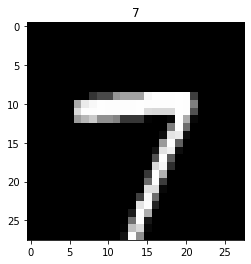

In [18]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()